# **Real Estate Price Prediction**
- For Real Estate Price Prediction, we'll be using following algorithms:
 1. Linear Regression
 2. Decision Tree Regressor
 3. Random Forest Regressor

- Following steps are followed:
1.  **Data preprocessing and exploration** to understand what kind of data will we working on.
2.  **Data Visualization** to draw insights and get better underdstanding on different columns present in the dataset.
3.  **Data Training** using train-test-split method from sklearn to split the data into training and testing data & **Model Creation** using different algorithms.
4.  Checking performance by **error and accuracy check** to find which algorithm is more  efficient algorithm for this project.


For the dataset being used [Click here](https://www.kaggle.com/quantbruce/real-estate-price-prediction)



### Data preprocessing and exploration

In [1]:
#importing pandas library.
import pandas as pd

In [2]:
#loading and reading data through following
data=pd.read_csv('/content/Real estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
#to view shape of the dataset i.e. total number of rows and columns.
data.shape

(414, 8)

The data has 414 rows and 8 columns in total.

In [4]:
#to view first 5 rows of the dataset.
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#to view last 5 rows of the dataset.
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [6]:
#to view different columns of the dataset.
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
#to view memory usage, non-null values, datatypes of columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
#to view statistical summary of the dataset.
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
#to check for any missing or null values in the dataset.
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

This displays the number of null values in the respective column.

In [10]:
#to view total null values in the dataset.
data.isnull().sum().sum()

0

This means that the dataset has no null values i.e. dataset is cleaned and proper.

We can now proceed with further steps.

In [32]:
#converting data into int datatype to avoid errors below.
prepareddata=data.astype(int)
prepareddata.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32,84,10,24,121,37
1,2,2012,19,306,9,24,121,42
2,3,2013,13,561,5,24,121,47
3,4,2013,13,561,5,24,121,54
4,5,2012,5,390,5,24,121,43


### Data Visualization.

In [11]:
# importing libaries for data visualization.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

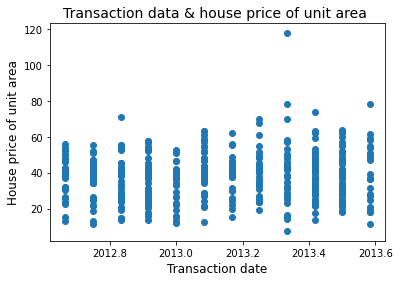

In [34]:
x=data['X1 transaction date']
y=data['Y house price of unit area']
plt.scatter(x,y)
plt.xlabel('Transaction date',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('Transaction data & house price of unit area ',fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


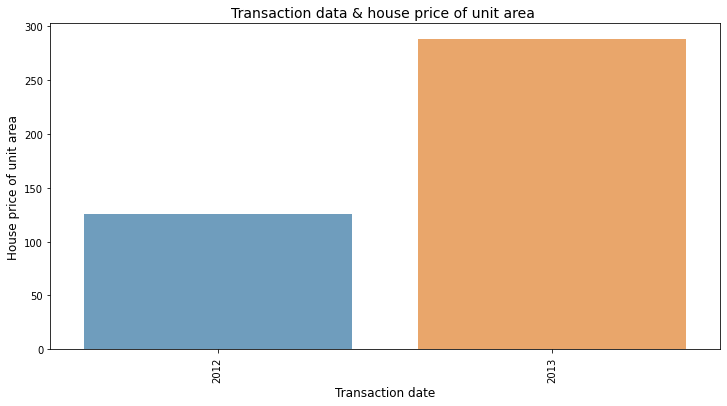

In [36]:
count=prepareddata['X1 transaction date'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.xlabel('Transaction date',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('Transaction data & house price of unit area ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

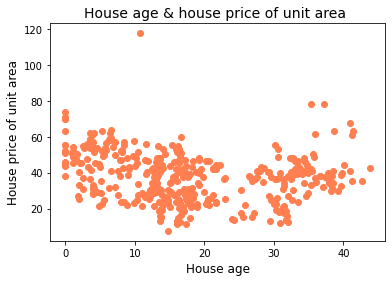

In [20]:
x=data['X2 house age']
y=data['Y house price of unit area']
plt.scatter(x,y,color='coral')
plt.xlabel('House age',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('House age & house price of unit area ',fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


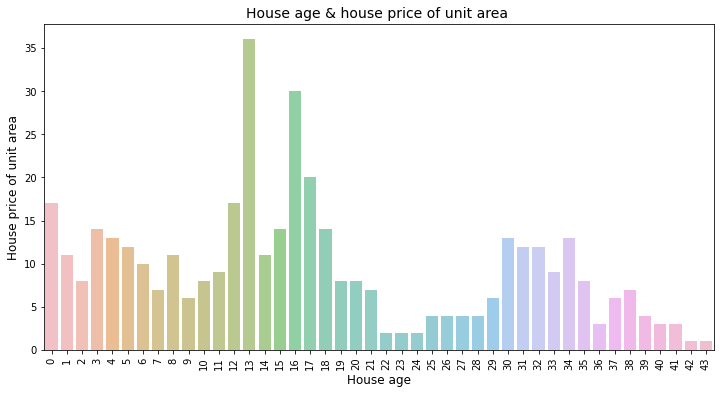

In [37]:
count=prepareddata['X2 house age'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.xlabel('House age',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('House age & house price of unit area ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

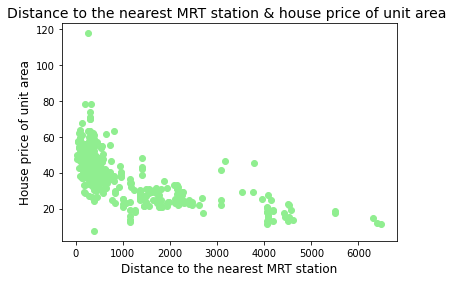

In [22]:
x=data['X3 distance to the nearest MRT station']
y=data['Y house price of unit area']
plt.scatter(x,y,color='lightgreen')
plt.xlabel('Distance to the nearest MRT station',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('Distance to the nearest MRT station & house price of unit area ',fontsize=14)
plt.show()

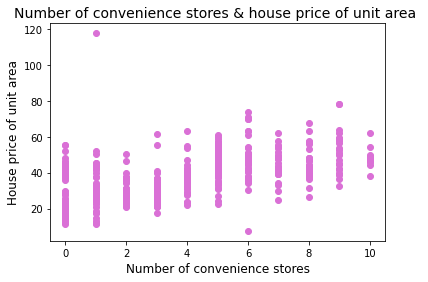

In [23]:
x=data['X4 number of convenience stores']
y=data['Y house price of unit area']
plt.scatter(x,y,color='orchid')
plt.xlabel('Number of convenience stores',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('Number of convenience stores & house price of unit area ',fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


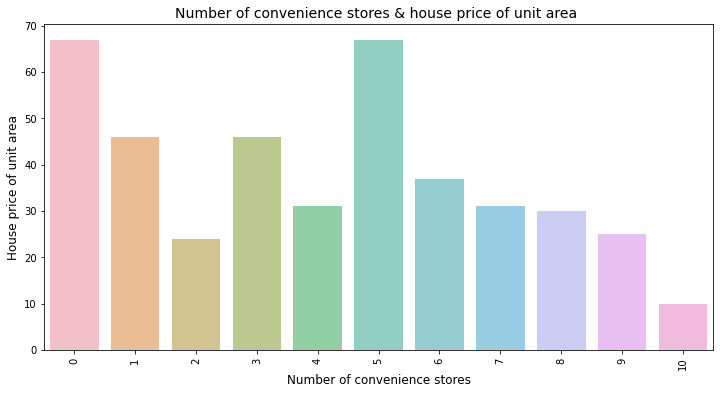

In [39]:
count=prepareddata['X4 number of convenience stores'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.xlabel('Number of convenience stores',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('Number of convenience stores & house price of unit area ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

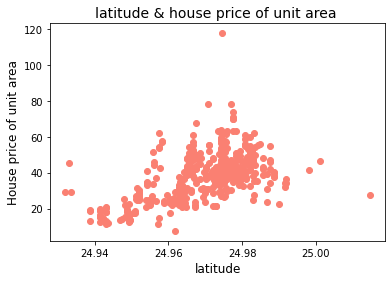

In [25]:
x=data['X5 latitude']
y=data['Y house price of unit area']
plt.scatter(x,y,color='salmon')
plt.xlabel('latitude',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('latitude & house price of unit area ',fontsize=14)
plt.show()

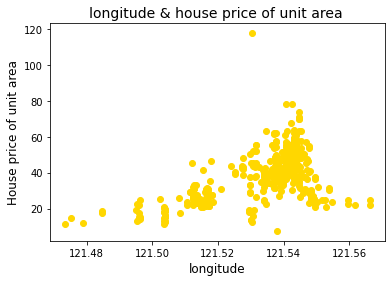

In [27]:
x=data['X6 longitude']
y=data['Y house price of unit area']
plt.scatter(x,y,color='gold')
plt.xlabel('longitude',fontsize=12)
plt.ylabel('House price of unit area',fontsize=12)
plt.title('longitude & house price of unit area ',fontsize=14)
plt.show()

### Data training & model creation using different algorithms.

*  Before moving to model creation using different algorithms, we have to split the data into training and testing data with a specified ratio.

*  It is always considered as a good practice to take more training data  in ratio as compared to the testing data so that the model can learn effectively and perform accurately.

*  For this we'll use train-test-split method from sklearn which splits the data into training and testing data on the basis of given ratio.



In [44]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have feature and y will have our target.
x=prepareddata[['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]  
y=prepareddata['Y house price of unit area']

In [51]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5) 
#Ratio used for splitting training and testing data is 8:2 respectively

Model creation using Linear Regression model.

In [52]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [53]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Making predictions 
pred1 = reg1.predict(x_test)

In [55]:
pred1

array([32.0220065 , 44.65198923, 30.98775094, 34.6177936 , 40.45051651,
       47.90106567, 54.54882643, 44.068845  , 34.41605172, 41.51408595,
       37.77256677, 34.36616514, 40.6092641 , 43.04596101, 53.29478142,
       36.65835639, 44.44206896, 42.49224803, 51.12808878, 49.19494285,
       40.64765914, 18.24202421, 44.29566045, 44.65198923, 50.96815071,
       44.44206896, 36.19140827, 40.17312224, 21.2734218 , 41.24663508,
       48.46368965, 35.24721179, 34.99142263, 53.61110245, 37.47831226,
       12.57857683, 48.49810346, 48.46368965, 35.441817  , 39.62834199,
       32.94401333, 33.56220836, 32.77747067, 40.76248808, 49.96201628,
       38.30469604, 27.95312015, 36.11453434, 44.01767233, 43.7825922 ,
       12.3258107 , 40.29227925, 42.20620575, 14.3379964 ,  9.26466643,
       38.1789655 , 34.41605172, 34.50352356, 38.62233422, 34.6177936 ,
       40.83215113, 28.45205291, 53.0996294 , 33.78233146, 28.15987566,
       27.14521862, 36.97563563, 46.22623123, 37.68061304, 41.16

Model creation using Decision Tree Regressor model.

In [64]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg2 = DecisionTreeRegressor()

In [65]:
#Fitting data into the model.
reg2.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
# Making predictions on Test data 
pred2 = reg2.predict(x_test)

In [67]:
pred2

array([32.        , 50.83333333, 23.        , 27.66666667, 62.        ,
       45.        , 50.        , 50.5       , 36.        , 46.        ,
       37.        , 30.        , 42.        , 39.        , 59.57142857,
       40.        , 40.25      , 38.        , 53.        , 47.        ,
       35.        , 16.66666667, 46.        , 50.83333333, 49.        ,
       40.25      , 41.        , 34.        , 22.        , 63.        ,
       39.        , 30.        , 25.        , 61.        , 30.        ,
       13.        , 57.66666667, 39.        , 30.33333333, 40.        ,
       26.5       , 23.        , 25.        , 47.5       , 47.        ,
       41.        , 23.        , 41.        , 40.        , 40.        ,
       22.        , 25.        , 37.        , 19.        , 17.        ,
       36.        , 36.        , 36.        , 28.        , 27.66666667,
       36.        , 18.        , 44.        , 33.        , 29.        ,
       34.        , 55.        , 48.        , 33.        , 39.  

Model Creation using Random Forest Regressor model.


In [59]:
#Importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor 
reg3 = RandomForestRegressor(n_estimators=100)

In [60]:
# Fitting data into the model.
reg3.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
#making predictions.
pred3 = reg3.predict(x_test)

In [63]:
pred3

array([30.19333333, 50.30730253, 21.41      , 27.56545238, 43.6415    ,
       50.05602381, 57.35353175, 48.92480952, 36.3       , 49.09857143,
       36.21857143, 28.3225    , 40.53333333, 40.91      , 55.36239755,
       38.808     , 40.42167857, 38.28      , 53.25313095, 46.982     ,
       35.555     , 16.9175    , 42.94666667, 50.30730253, 48.78979365,
       40.42167857, 36.53      , 36.12316667, 29.21433333, 62.15      ,
       44.69666667, 34.26      , 35.345     , 55.38864971, 34.56833333,
       18.69833333, 56.15098701, 44.69666667, 30.44409524, 38.2025    ,
       25.23383333, 24.285     , 26.48216667, 51.15052381, 47.70795238,
       38.54      , 20.3       , 40.17090476, 34.78633333, 38.76166667,
       19.92333333, 34.08      , 39.6175    , 15.84840476, 19.235     ,
       37.76266667, 36.3       , 42.11      , 29.56567857, 27.56545238,
       41.228     , 19.56333333, 47.59      , 29.82214286, 25.1665    ,
       34.13333333, 43.88333333, 39.46666667, 36.38857143, 39.78

### Performance check.

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t          RootMeanSquareError  \t\t    Accuracy of the model") 
print("""Linear Regression       \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Decision Tree Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))
print("""Random Forest Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(x_train,y_train)))

Model			          RootMeanSquareError  		    Accuracy of the model
Linear Regression       		 7.9600 	 		 0.5558
Decision Tree Regressor 		 8.2505 	 		 0.9825
Random Forest Regressor 		 7.3861 	 		 0.9359


Conclusion drawn:


*   When considering all the features given in the dataset, the accuracy of linear regression appears to be 55.58% which is not so good, that of decision tree regressor is 98.25% and of random forest regressor is 93.59%.

*   Decision Tree Regressor has best accuracy as compared to linear regression and random forest regresor.




